<a href="https://colab.research.google.com/github/souldrive7/ECP/blob/main/%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E8%AA%B2%E9%A1%8C%E2%80%97%E6%9D%91%E6%9D%BE%E5%85%88%E7%94%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習 課題（村松先生）

### 氏名：後藤 晃郁

### 学籍番号：6025131

### 提出日：2025/5/

# 課題

---

- 学習データ数，クラス数，特徴量数のいずれかを変化させたときのkNNの精度を比較する

- それぞれでkの値はcvを用いて最適化すること

- 結果は可視化して簡単な考察を加えること

- 提出物：jupyternotebook，pyファイル等，結果はnotebook上に示してもtext，pdf等で提出しても良い

---

# 学習データ数，クラス数，特徴量数のいずれかを変化させたときのkNNの精度を比較する

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import keras

In [4]:
# CIFAR-10 をロード
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("原画像数:", x_train.shape, x_test.shape)

# ここではクラス 1 ('automobile') と 9 ('truck') のみ抽出
cl1 = 1
cl2 = 9
x_train0 = x_train[np.where(y_train==cl1)[0]]
x_train1 = x_train[np.where(y_train==cl2)[0]]
x_test0 = x_test[np.where(y_test==cl1)[0]]
x_test1 = x_test[np.where(y_test==cl2)[0]]
print(x_train0.shape, x_train1.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
原画像数: (50000, 32, 32, 3) (10000, 32, 32, 3)
(5000, 32, 32, 3) (5000, 32, 32, 3)


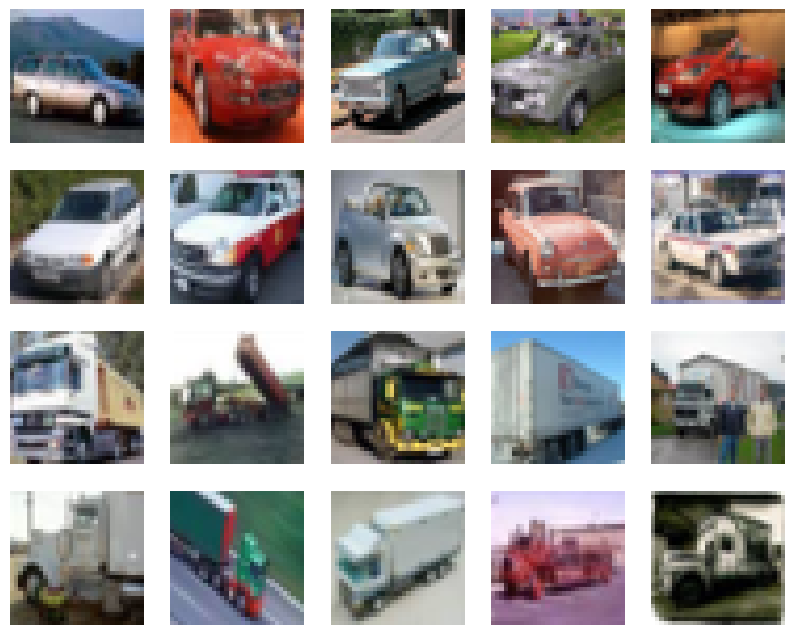

In [5]:
fig,ax = plt.subplots(4,5,figsize=(10,8))
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_train0[i])
  ax[i].axis('off')
  ax[i+10].imshow(x_train1[i])
  ax[i+10].axis('off')

In [6]:
x_tr = np.vstack((x_train0[:500],x_train1[:500]))
x_te = np.vstack((x_test0[:100],x_test1[:100]))
y_tr = np.vstack((np.zeros((500,1),int),np.ones((500,1),int)))
y_te = np.vstack((np.zeros((100,1),int),np.ones((100,1),int)))

In [7]:
x_tr.shape

(1000, 32, 32, 3)

In [8]:
x_tr = x_tr.reshape(x_tr.shape[0],-1)
x_te = x_te.reshape(x_te.shape[0],-1)
x_tr.shape

(1000, 3072)

In [9]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(x_tr)
test_pca = pca.transform(x_te)
train_pca.shape

(1000, 2)

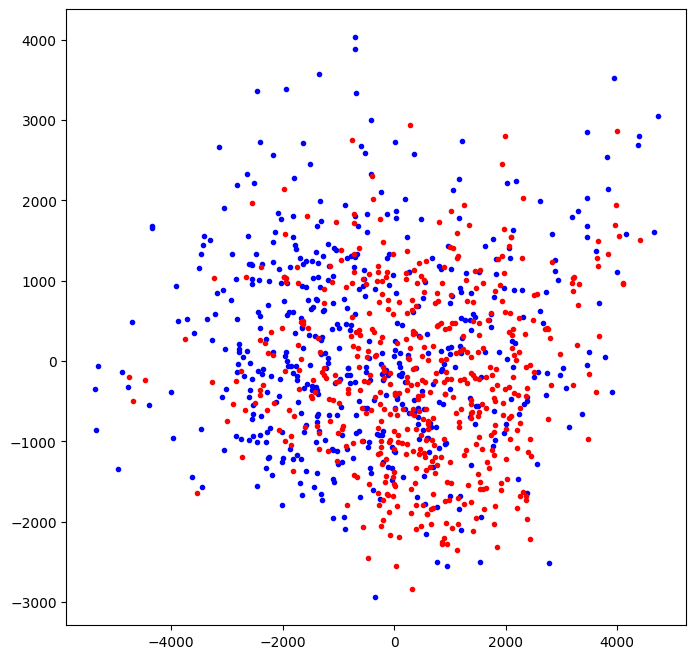

In [10]:
fig,ax = plt.subplots(figsize=(8,8))
t0 = train_pca[np.where(y_tr==0)[0],:]
t1 = train_pca[np.where(y_tr==1)[0],:]
ax.plot(t0[:,0],t0[:,1],'b.')
ax.plot(t1[:,0],t1[:,1],'r.')

In [11]:
k = 3
knn = KNeighborsClassifier(k).fit(train_pca, y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
pr_te = knn.predict(test_pca)
print(confusion_matrix(y_te, pr_te))
print(classification_report(y_te, pr_te))

[[56 44]
 [40 60]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       100
           1       0.58      0.60      0.59       100

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



In [13]:
# 失敗ケース
failed = []
for i, (y_true, y_pred) in enumerate(zip(y_te, pr_te)):
  if y_true != y_pred:
    failed.append(i)
print(failed[:5])

[1, 2, 3, 8, 10]


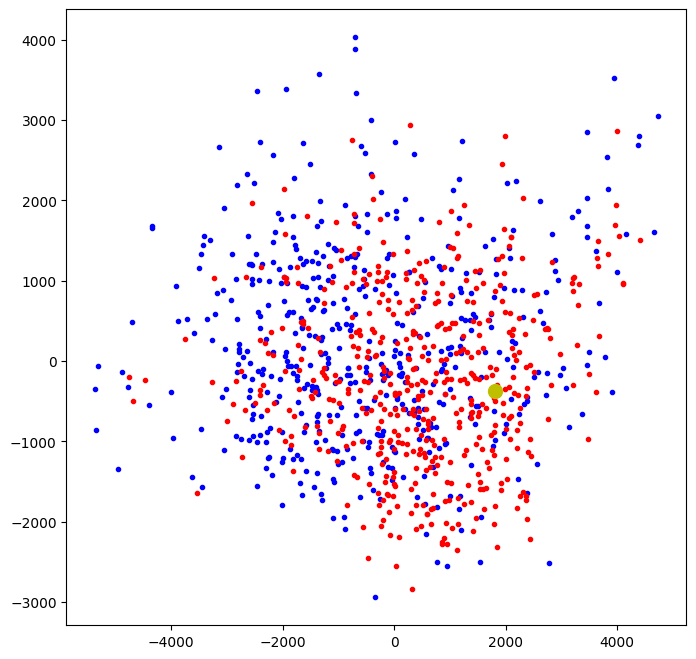

In [14]:
f = 1
fig,ax = plt.subplots(figsize=(8,8))
t0 = train_pca[np.where(y_tr==0)[0],:]
t1 = train_pca[np.where(y_tr==1)[0],:]
ax.plot(t0[:,0],t0[:,1],'b.')
ax.plot(t1[:,0],t1[:,1],'r.')
ax.plot(test_pca[f,0], test_pca[f,1], 'yo', markersize=10)

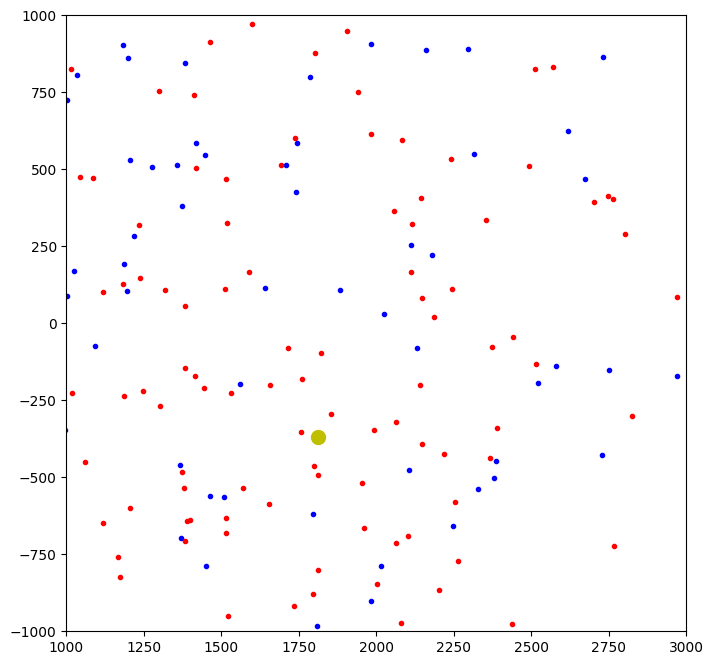

In [15]:
ax.set_xlim(1000,3000)
ax.set_ylim(-1000,1000)
fig

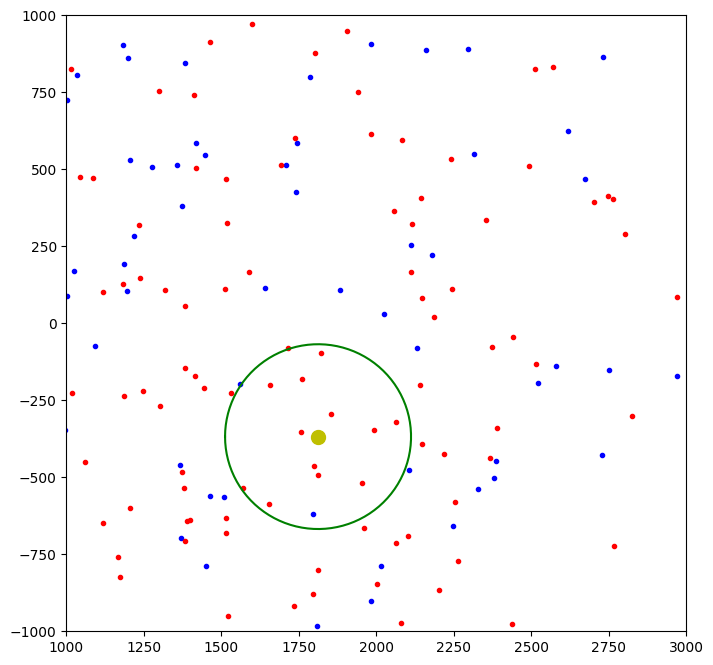

In [16]:
rad = np.linspace(-np.pi, np.pi,100)
r = 300
ax.plot(r*np.cos(rad)+test_pca[f,0],r*np.sin(rad)+test_pca[f,1],'g')
fig

In [17]:
# 特徴量数の変更
# 1. pca の次元数を変更
# 2. 画像のサイズを落とす

In [18]:
from PIL import Image

In [19]:
w = h = 16
x_tr_sm = np.zeros((x_tr.shape[0], h, w, 3))
for i,smp in enumerate(x_tr):
  img = Image.fromarray(smp.reshape(32,32,3))
  img = img.resize((w,h), Image.LANCZOS)
  x_tr_sm[i] = np.array(img, np.uint8)

In [20]:
x_tr_sm.shape

(1000, 16, 16, 3)

In [21]:
x_te_sm = np.zeros((x_te.shape[0], h, w, 3))
for i,smp in enumerate(x_te):
  img = Image.fromarray(smp.reshape(32,32,3))
  img = img.resize((w,h), Image.LANCZOS)
  x_te_sm[i] = np.array(img, np.uint8)

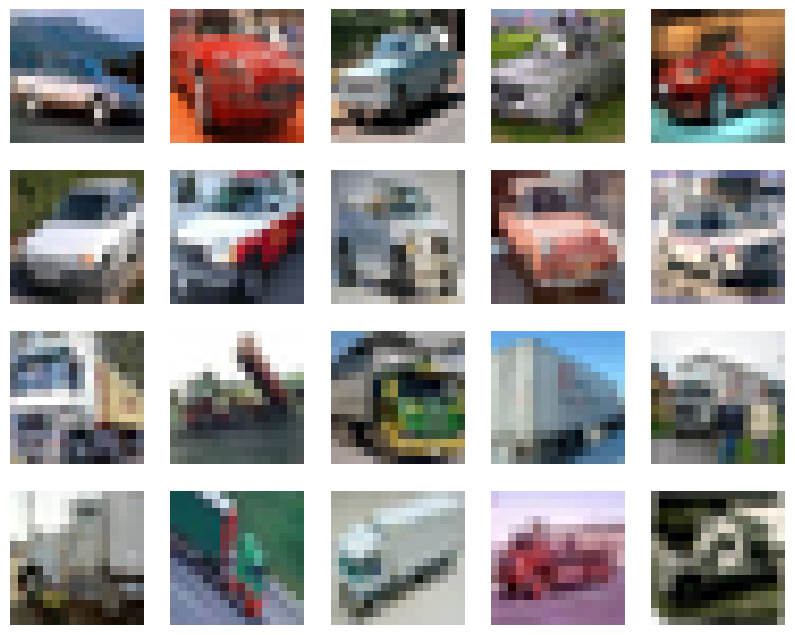

In [22]:
fig,ax = plt.subplots(4,5,figsize=(10,8))
ax = ax.flatten()
for i in range(10):
  ax[i].imshow(x_tr_sm[i]/255)
  ax[i].axis('off')
  ax[i+10].imshow(x_tr_sm[i+500]/255)
  ax[i+10].axis('off')

In [23]:
# 追加
# グリッドサーチ

from sklearn.model_selection import GridSearchCV

In [26]:
param = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
knn2 = KNeighborsClassifier()
gs = GridSearchCV(knn2, param, cv=4)
gs.fit(x_tr, y_tr.ravel())
res = pd.DataFrame.from_dict(gs.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002922,0.000870,0.081253,0.002732,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.680,0.660,0.624,0.592,0.639,0.033749,10
1,0.002370,0.000060,0.062983,0.003049,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.684,0.660,0.624,0.592,0.640,0.034986,9
2,0.002107,0.000489,0.079643,0.010650,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.708,0.696,0.680,0.664,0.687,0.016583,1
3,0.001866,0.000041,0.059915,0.002321,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.708,0.696,0.680,0.664,0.687,0.016583,1
4,0.001814,0.000017,0.072827,0.001664,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.660,0.676,0.688,0.660,0.671,0.011790,7
5,0.001831,0.000012,0.058002,0.001934,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.660,0.676,0.688,0.660,0.671,0.011790,7
6,0.001835,0.000063,0.079091,0.009732,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.676,0.680,0.692,0.664,0.678,0.010000,3
7,0.001775,0.000023,0.056614,0.000225,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.676,0.680,0.692,0.664,0.678,0.010000,3
8,0.001801,0.000031,0.074384,0.001899,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.724,0.668,0.680,0.636,0.677,0.031544,5
9,0.001867,0.000118,0.057970,0.001870,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.724,0.668,0.680,0.636,0.677,0.031544,5


In [27]:
gs.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [28]:
pr_te = gs.best_estimator_.predict(x_te) # knn2 = KNeighborsClassifier(**gs.best_params).fit(x_tr, y_tr).predict(x_te) （ベストのパラメータを使って学習したモデル）と同じ

In [29]:
print(confusion_matrix(y_te, pr_te))
print(classification_report(y_te, pr_te))

[[73 27]
 [37 63]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.70       100
           1       0.70      0.63      0.66       100

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

